In [ ]:
# (sFigure17)-Characteristics of Intestinal Metaplasia Process in Gastric Mucosal with H. pylori Infection.

In [2]:
import anndata as ad
import scanpy as sc
import omicverse as ov

2024-03-11 20:11:14.397981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 20:11:19.308333: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 20:11:51.589220: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:
2024-03-11 20:11:51.590853: W tensorflow/compiler/


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.8, Tutorials: https://omicverse.readthedocs.io/


In [3]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_style('white')

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
Epi = sc.read_h5ad('Gastric/Data/Epi_anno.h5ad')
Epi

AnnData object with n_obs × n_vars = 26265 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Epi_celltype', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
Epi.uns['Epi_celltype_colors'] = [ov.pl.blue_color[2],ov.pl.blue_color[3],ov.pl.red_color[4],ov.pl.blue_color[5],
                                  ov.pl.red_color[0],ov.pl.red_color[2],ov.pl.red_color[1]]

In [6]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 63398 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [7]:
Epi_raw = adata_raw[Epi.obs_names,:]
Epi_raw = Epi_raw[:,~Epi_raw.var_names.str.contains('RPS')]
Epi_raw = Epi_raw[:,~Epi_raw.var_names.str.contains('RPL')]
Epi_raw.obs = Epi.obs
#normalize and high variable genes (HVGs) calculated
Epi=ov.pp.preprocess(Epi_raw,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
Epi.raw = Epi
Epi = Epi[:, Epi.var.highly_variable_features]

Epi.layers['lognorm'] = Epi.X
Epi

Begin robust gene identification
After filtration, 30683/32115 genes are kept. Among 30683 genes, 21247 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['DEFA5', 'DEFA6', 'GKN1', 'IGHV1-69D', 'IGHV2-5', 'IGHV3-53', 'IGKV1D-13', 'IGKV1D-33', 'IGKV3-11', 'IGKV3-20', 'IGLV1-40', 'IGLV2-11', 'IGLV2-14', 'IGLV2-23', 'IGLV3-21', 'IGLV3-25', 'MALAT1', 'MT-RNR2', 'MUC5AC', 'PGA3', 'PGC', 'PHGR1', 'REG3A', 'SPINK4', 'TFF1']
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variance

AnnData object with n_obs × n_vars = 26265 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

# PC DEG analysis

In [28]:
Epi_all_genes = Epi.raw.to_adata()
PC_all_genes = Epi_all_genes[Epi_all_genes.obs['Epi_celltype'].isin(['IM_PC','PC'])]
PC_all_genes

View of AnnData object with n_obs × n_vars = 4000 × 21247
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


<AxesSubplot: title={'center': 'Sample'}, xlabel='X_umap1', ylabel='X_umap2'>

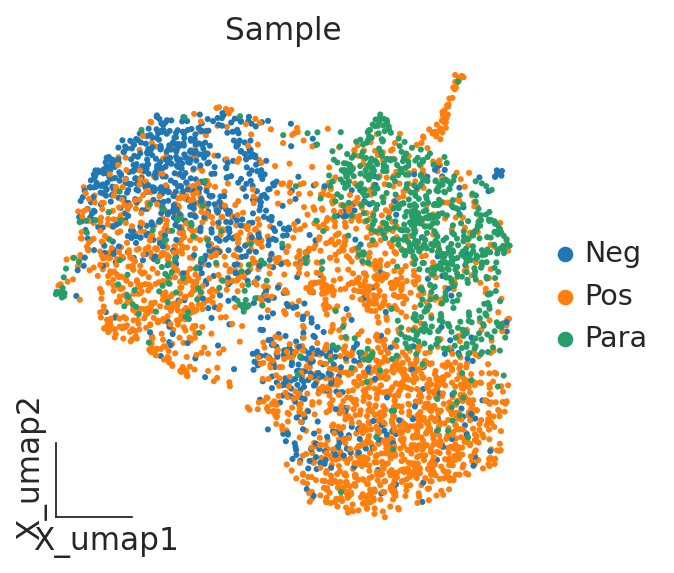

In [30]:
sc.pp.neighbors(PC_all_genes, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(PC_all_genes)
sc.pl.paga(PC_all_genes, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(PC_all_genes,init_pos='paga')
ov.utils.embedding(
    PC_all_genes,
    color=['Sample'],
    basis="X_umap",
    color_map="RdBu_r",
    frameon='small',
    show =False,
)

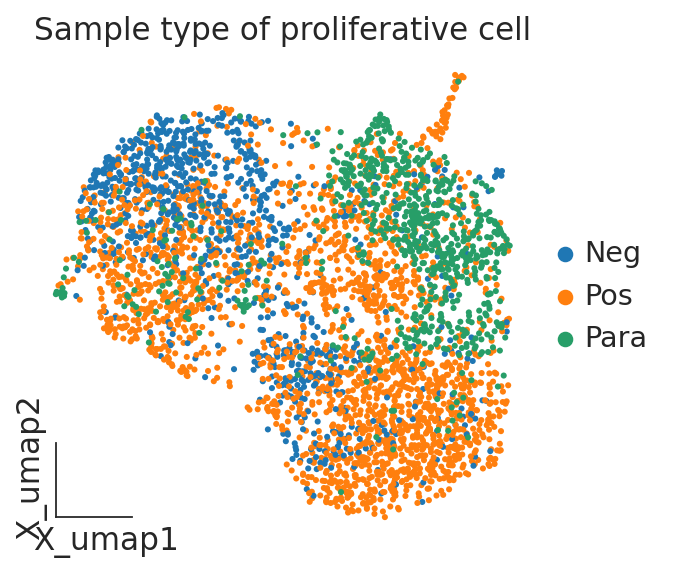

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)
ov.utils.embedding(
    PC_all_genes,
    color=['Sample'],
    basis="X_umap",
    color_map="RdBu_r",
    frameon='small',
    show =False,
    ax=axes
)
plt.title('Sample type of proliferative cell')
plt.savefig("Gastric/Figure/sFigure17/sFigure17_A.png",dpi=300,bbox_inches = 'tight')

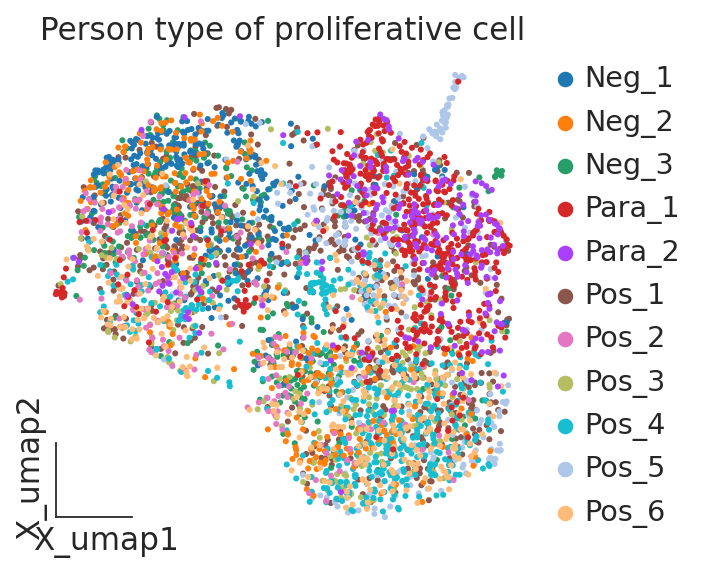

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)
ov.utils.embedding(
    PC_all_genes,
    color=['Person'],
    basis="X_umap",
    color_map="RdBu_r",
    frameon='small',
    show =False,
    ax=axes
)
plt.title('Person type of proliferative cell')
plt.savefig("Gastric/Figure/sFigure17/sFigure17_B.png",dpi=300,bbox_inches = 'tight')

In [92]:
IM_Gene_list = ['FABP1','FABP2','CDH17','CLDN7','CLDN4','REG4','CDX1','CDX2']
sc.tl.score_genes(PC_all_genes, IM_Gene_list, score_name='Intestinal metaplasia score')

computing score 'Intestinal metaplasia score'
    finished: added
    'Intestinal metaplasia score', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)


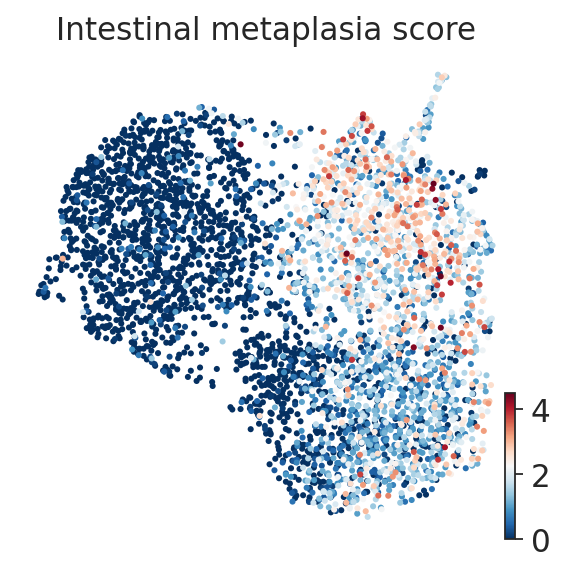

In [93]:
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(PC_all_genes,
                basis='X_umap',
                color=['Intestinal metaplasia score'],
                title='Intestinal metaplasia score of proliferative cells',
                frameon=False,
                show=False,
                cmap='RdBu_r',
                vmax=4.5,
                vmin=0,
                ax=ax)

ax.set_title('Intestinal metaplasia score')
plt.savefig("Gastric/Figure/sFigure17/sFigure17_C.png",dpi=300,bbox_inches = 'tight')


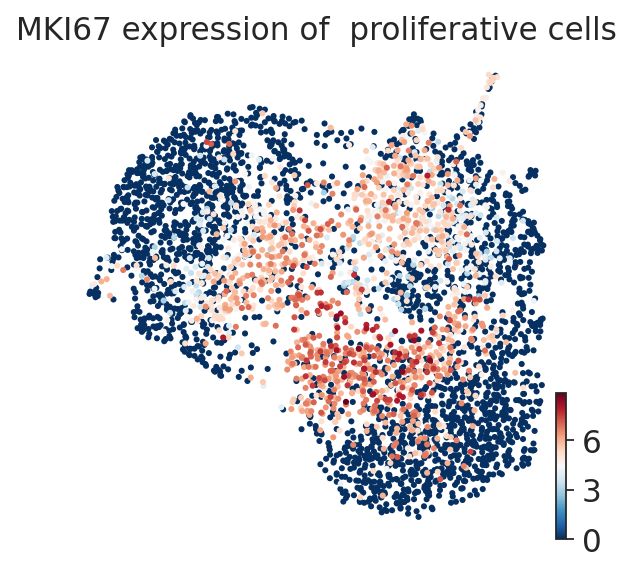

In [95]:
fig,ax=plt.subplots( figsize = (4,4))
ax = ov.utils.embedding(PC_all_genes,
                basis='X_umap',
                color=['MKI67'],
                title='Intestinal metaplasia score of proliferative cells',
                frameon=False,
                show=False,
                cmap='RdBu_r',
                vmin=0,
                ax=ax)

ax.set_title('MKI67 expression of  proliferative cells')
plt.savefig("Gastric/Figure/sFigure17/sFigure17_D.png",dpi=300,bbox_inches = 'tight')


In [32]:
PC = PC_all_genes[:,PC_all_genes.var['highly_variable_features']==True]
PC

View of AnnData object with n_obs × n_vars = 4000 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [111]:
# PC
dds=ov.bulk.pyDEG(PC.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=PC[PC.obs['Sample']=='Para'].obs.index.tolist()
control_groups=PC[PC.obs['Sample']=='Pos'].obs.index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=1,
                   pval_threshold=0.05,
                   logp_max=200)


... drop_duplicates_index success
... Fold change threshold: 1


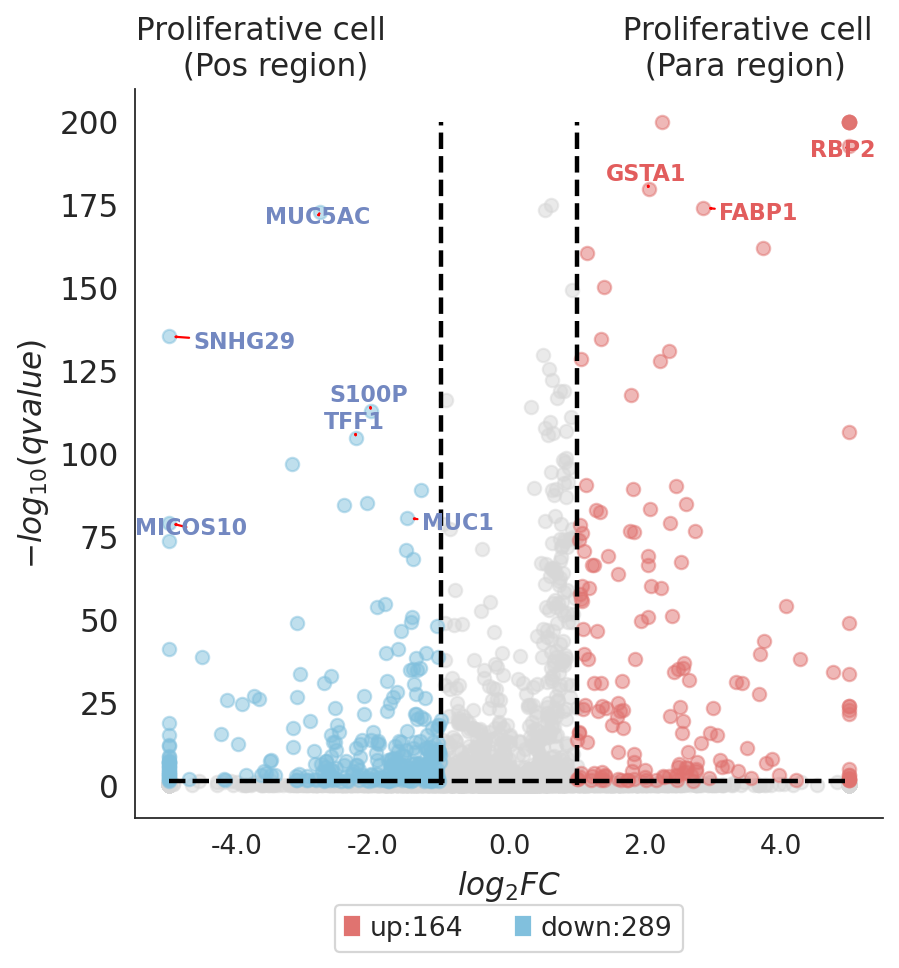

In [117]:
dds.result.loc[dds.result.loc[:,'log2FC']<-5,'log2FC']=-5
dds.result.loc[dds.result.loc[:,'log2FC']>5,'log2FC']=5
ax = dds.plot_volcano(title='Proliferative cell                        Proliferative cell \n (Pos region)                            (Para region)',figsize=(6,6),
                 plot_genes_num=20,plot_genes_fontsize=10,legend_bbox=(0.75, -0.1),down_color=ov.pl.blue_color[2],up_color=ov.pl.red_color[1],
                     plot_genes=['SNHG29','TFF1','S100P','MUC5AC','MICOS10','MUC1','FABP1','RBP2','GSTA1',])#plot_genes=['s'])
plt.savefig("Gastric/Figure/sFigure17/sFigure17_E.png",dpi=300,bbox_inches = 'tight')

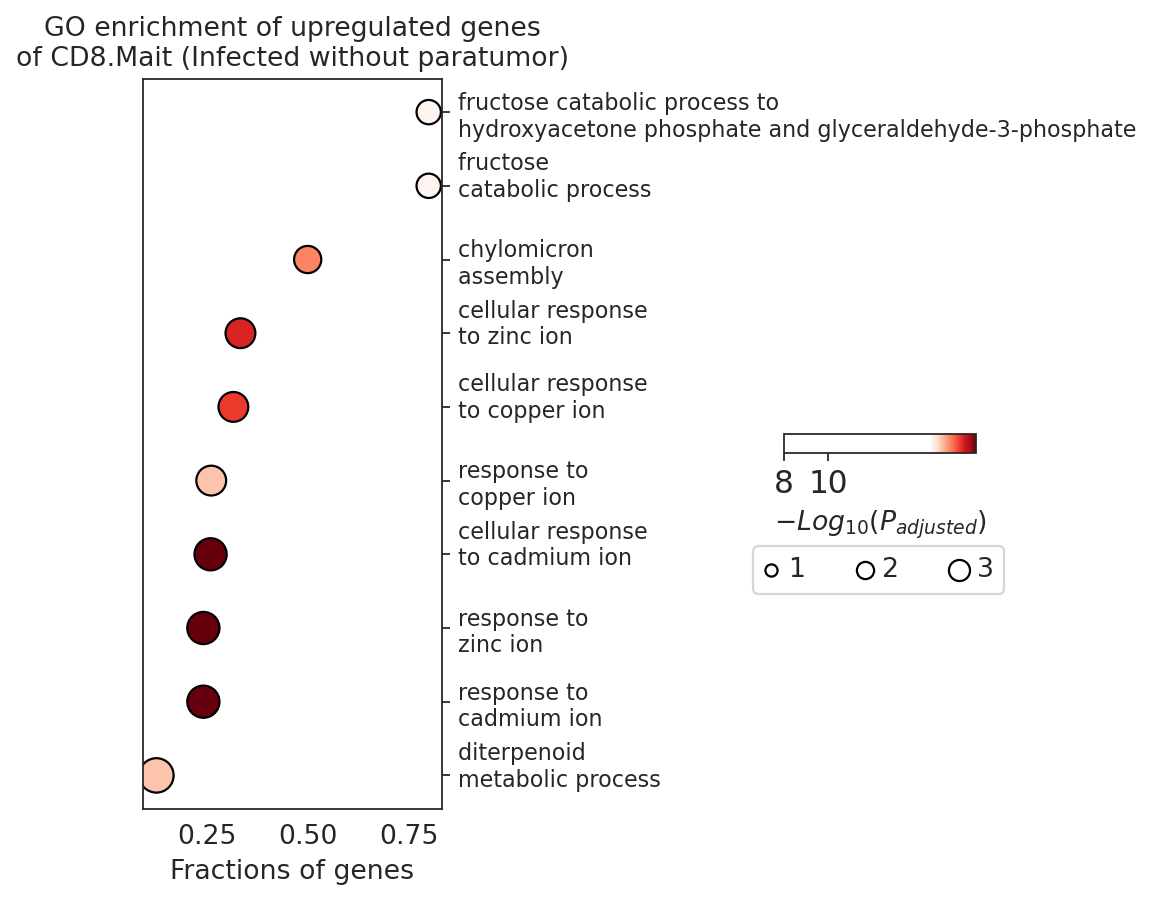

In [122]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2.4,6),fig_title='GO enrichment of upregulated genes\nof CD8.Mait (Infected without paratumor)',
                          node_size=[1, 2, 3],
                          cax_loc=[1.85, 0.52, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.23, -8),node_diameter=30,custom_ticks=[8,10],
                        cmap='Reds')
#plt.savefig("Gastric/Figure/sFigure17/sFigure17_F.png",dpi=300,bbox_inches = 'tight')

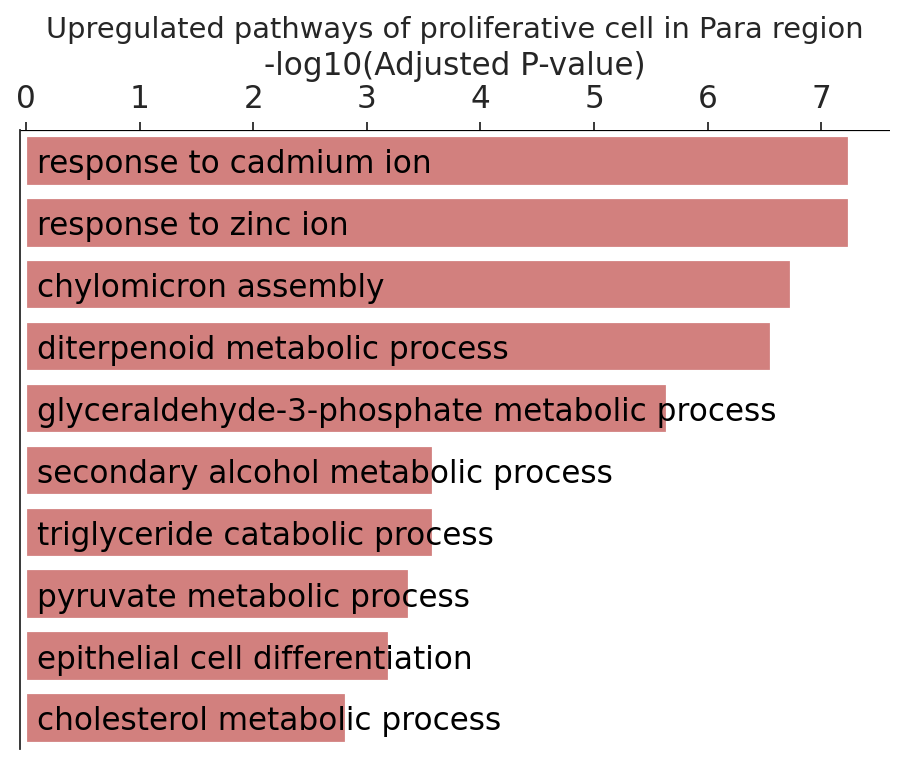

In [123]:
enr = enr[enr.loc[:,'Term'].isin(['response to cadmium ion (GO:0046686)',
                                  'response to zinc ion (GO:0010043)',
                                  'chylomicron assembly (GO:0034378)',
                                  'diterpenoid metabolic process (GO:0016101)',
                                  'glyceraldehyde-3-phosphate metabolic process (GO:0019682)',
                                  'secondary alcohol metabolic process (GO:1902652)',
                                  'triglyceride catabolic process (GO:0019433)',
                                  'pyruvate metabolic process (GO:0006090)',
                                  'epithelial cell differentiation (GO:0030855)',
                                  'cholesterol metabolic process (GO:0008203)',
])]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')


enr['Term'] = enr['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr_sorted = enr.sort_values('-log10(Adjusted P-value)', ascending=False)


f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True)  
colors = [ov.pl.red_color[1]]*len(enr.index) 
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', 
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05)  
ax.set_title('Upregulated pathways of proliferative cell in Para region', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig("Gastric/Figure/sFigure17/sFigure17_F.png",dpi=300,bbox_inches = 'tight')
plt.show()

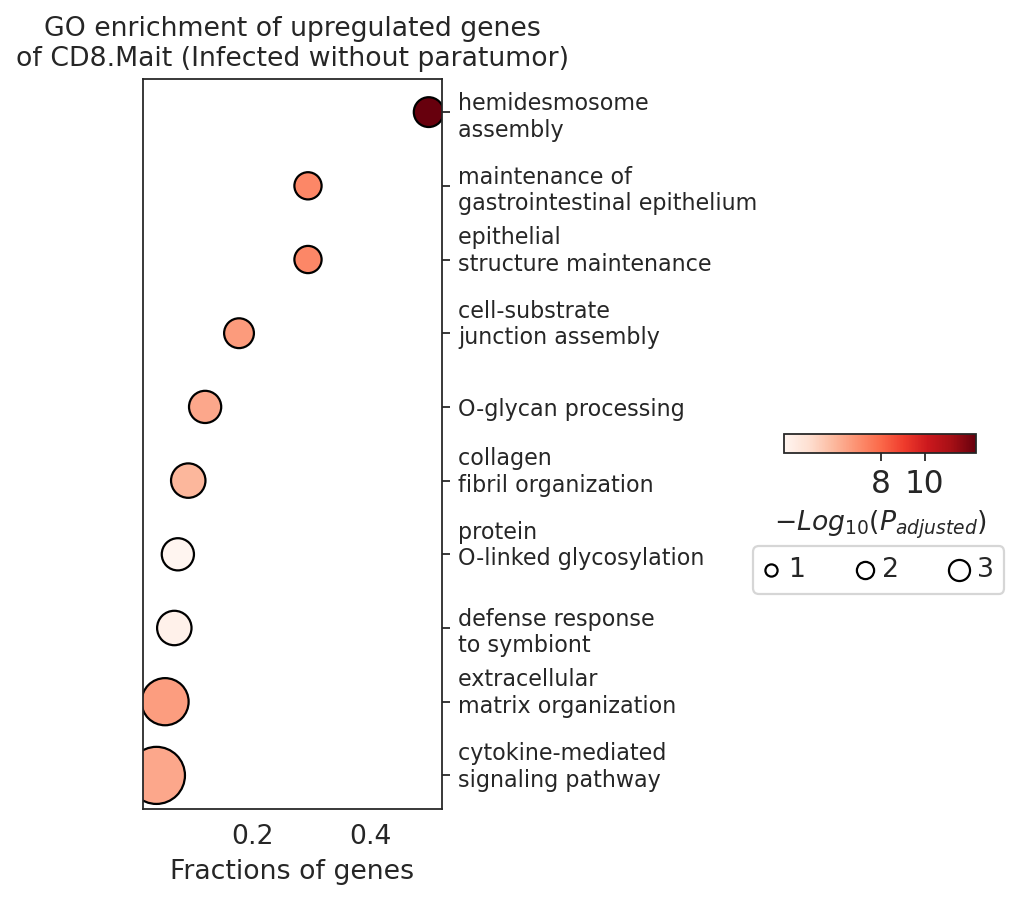

In [124]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']<0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2.4,6),fig_title='GO enrichment of upregulated genes\nof CD8.Mait (Infected without paratumor)',
                          node_size=[1, 2, 3],
                          cax_loc=[1.85, 0.52, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.23, -8),node_diameter=30,custom_ticks=[8,10],
                        cmap='Reds')
#plt.savefig('Gastric/Figure/sFigure4/sFigure4_F',dpi=300,bbox_inches = 'tight')

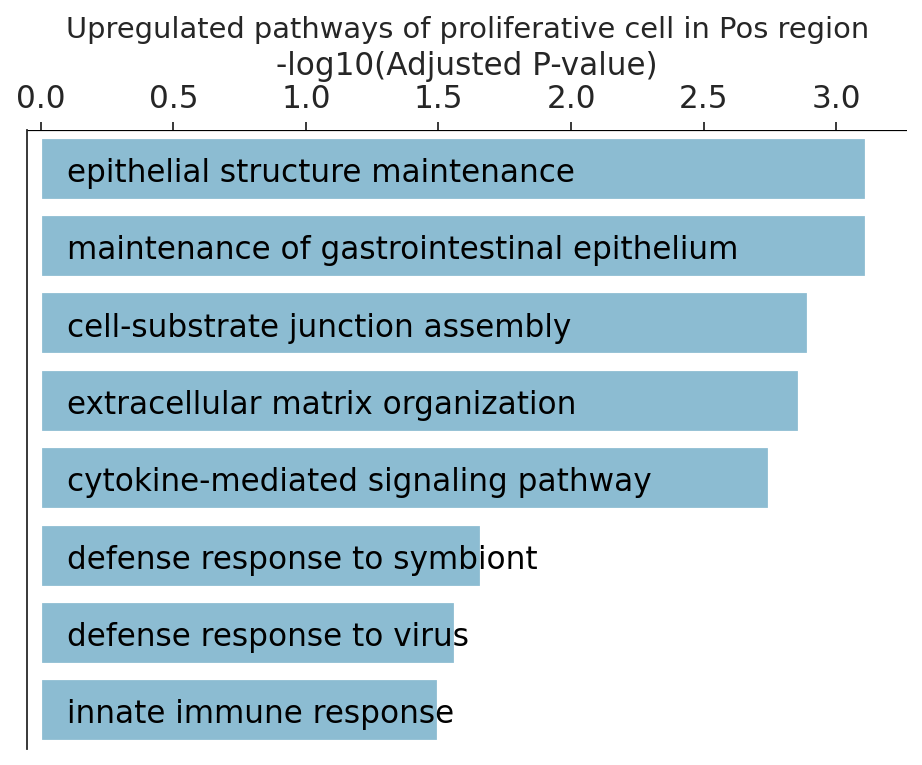

In [125]:

enr = enr[enr.loc[:,'Term'].isin(['epithelial structure maintenance (GO:0010669)',
                                  'maintenance of gastrointestinal epithelium (GO:0030277)',
                                  'cell-substrate junction assembly (GO:0007044)',
                                  'extracellular matrix organization (GO:0030198)',
                                  'cytokine-mediated signaling pathway (GO:0019221)',
                                  'defense response to virus (GO:0051607)',
                                  'triglyceride catabolic process (GO:0019433)',
                                  'defense response to symbiont (GO:0140546)',
                                  'innate immune response (GO:0045087)',
])]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')

enr['Term'] = enr['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr['-log10(Adjusted P-value)'] = -np.log10(enr['Adjusted P-value'])
enr_sorted = enr.sort_values('-log10(Adjusted P-value)', ascending=False)


f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True)  
colors = [ov.pl.blue_color[2]]*len(enr.index) 
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', 
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05) 
ax.set_title('Upregulated pathways of proliferative cell in Pos region', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig("Gastric/Figure/sFigure17/sFigure17_G.png",dpi=300,bbox_inches = 'tight')
plt.show()

# Enterocytes analysis

In [126]:
Epi_all_genes = Epi.raw.to_adata()
Enterocytes_all_genes = Epi_all_genes[Epi_all_genes.obs['Epi_celltype']=='IM_Enterocytes']
Enterocytes_all_genes

View of AnnData object with n_obs × n_vars = 5195 × 21247
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [127]:
sc.pp.neighbors(Enterocytes_all_genes, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(Enterocytes_all_genes)
sc.pl.paga(Enterocytes_all_genes, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(Enterocytes_all_genes,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


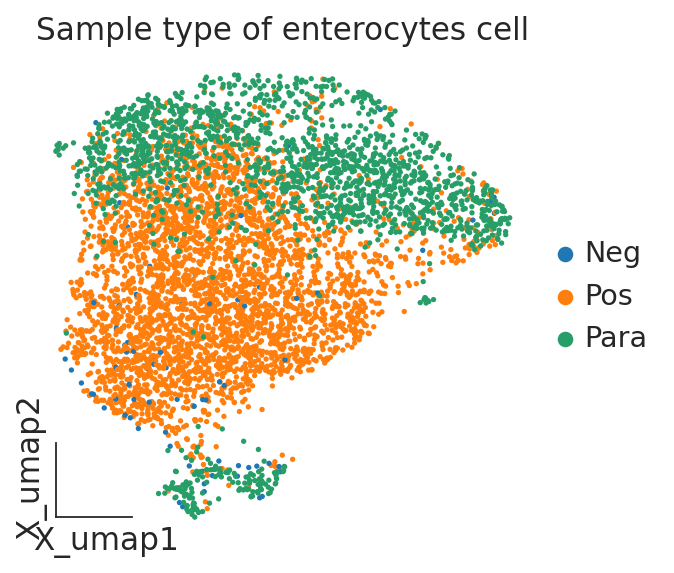

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)
ov.utils.embedding(
    Enterocytes_all_genes,
    color=['Sample'],
    basis="X_umap",
    color_map="RdBu_r",
    frameon='small',
    show =False,
    ax=axes
)
plt.title('Sample type of enterocytes cell')
plt.savefig("Gastric/Figure/sFigure17/sFigure17_H.png",dpi=300,bbox_inches = 'tight')

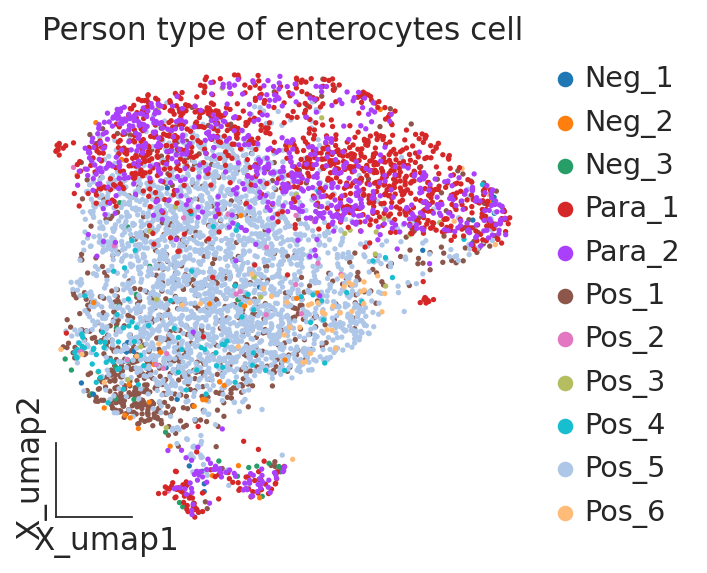

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)
ov.utils.embedding(
    Enterocytes_all_genes,
    color=['Person'],
    basis="X_umap",
    color_map="RdBu_r",
    frameon='small',
    show =False,
    ax=axes
)
plt.title('Person type of enterocytes cell')
plt.savefig("Gastric/Figure/sFigure17/sFigure17_I.png",dpi=300,bbox_inches = 'tight')

In [18]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
pathway_dict['epithelial structure maintenance (GO:0010669)']

['CXADR',
 'SERPINA3',
 'LACRT',
 'PIWIL4',
 'CRACD',
 'STRAP',
 'NOD2',
 'PBLD',
 'MUC2',
 'RBP4',
 'VSIG1',
 'MUC13',
 'TLR9',
 'TFF3',
 'TFF2',
 'TFF1',
 'MUC4',
 'MUC6']

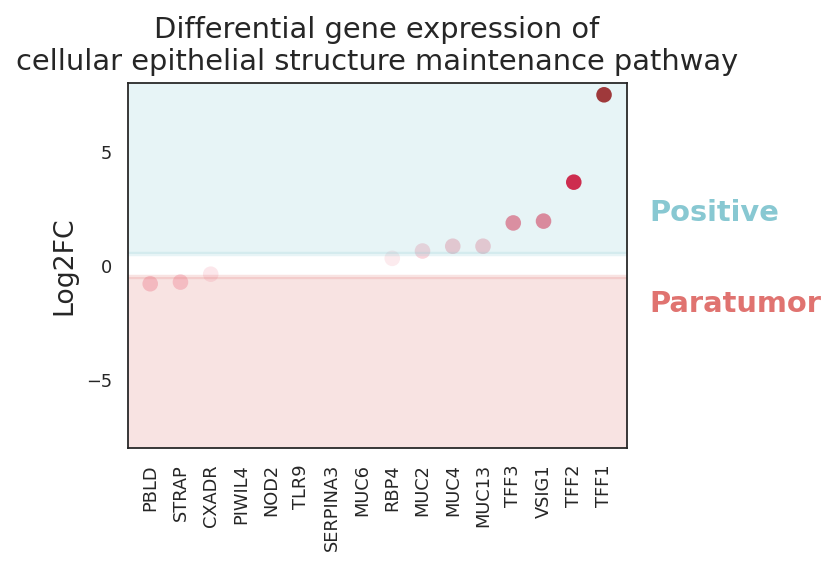

In [130]:
adata_raw_used = Enterocytes_all_genes[:,(Enterocytes_all_genes.var_names)&(pathway_dict['epithelial structure maintenance (GO:0010669)'])]
adata_raw_used_treatment = adata_raw_used[adata_raw_used.obs['Sample'].isin(['Pos'])]
adata_raw_used_control = adata_raw_used[adata_raw_used.obs['Sample'].isin(['Para'])]
result = adata_raw_used_treatment.to_df().mean(axis=0)
result = pd.DataFrame(result)
result.columns = ['Paratumor']
result['Positive'] =  adata_raw_used_control.to_df().mean(axis=0)
result_d=result.loc[:,'Paratumor']-result.loc[:,'Positive']
result_d=result_d.sort_values()


from colormap import Colormap
c = Colormap()
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017','#9F987F', '#E0DFED', '#EF7B77', '#279AD7',
 '#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10', '#EAEFC5', '#01A0A7', '#75C8CC', 
'#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812','#9DC3C3', '#A89C92', '#FEE00C','#FEF2A1']
rnacmap = c.cmap_linear( '#ffffff','#de0029','#a51616')
nodecmap= c.cmap_linear( '#a51616','#ffffff',sc_color[11])

type_color={
    'Pos':ov.pl.blue_color[4],
    'Neg':ov.pl.red_color[1]
}
fig, ax = plt.subplots(figsize=(4,3)) 

plt.scatter(result_d.index,result_d.values,c=abs(result_d.values),cmap=rnacmap)
regulons_d_num=(abs(result_d.min())>abs(result_d.max()) and abs(result_d.min()) or abs(result_d.max()))
regulons_d_min=(0-round(regulons_d_num,5))-0.5
regulons_d_max=round(regulons_d_num,5)+0.5
plt.yticks(fontsize=8)
plt.ylim(regulons_d_min,regulons_d_max)
plt.grid(False)

plt.xticks(fontsize=8,rotation=90)

plt.gca().add_patch(plt.Rectangle(xy=(-2,0.5),
width=len(result_d)+3, color=type_color['Pos'],
height=15,alpha=.2,
fill=True, linewidth=2))

plt.gca().add_patch(plt.Rectangle(xy=(-2,-0.5),
width=len(result_d)+3, color=type_color['Neg'],
height=-15,alpha=.2,
fill=True, linewidth=2))

plt.text(len(result_d)+0.5,2,'Positive',fontsize=13,color=type_color['Pos'],fontweight='bold')
plt.text(len(result_d)+0.5,-2,'Paratumor',fontsize=13,color=type_color['Neg'],ha='left',fontweight='bold')
ax.set_title('Differential gene expression of\ncellular epithelial structure maintenance pathway', fontsize=13)
plt.ylabel('Log2FC',fontsize=12)
plt.savefig("Gastric/Figure/sFigure17/sFigure17_J.png",dpi=300,bbox_inches = 'tight')

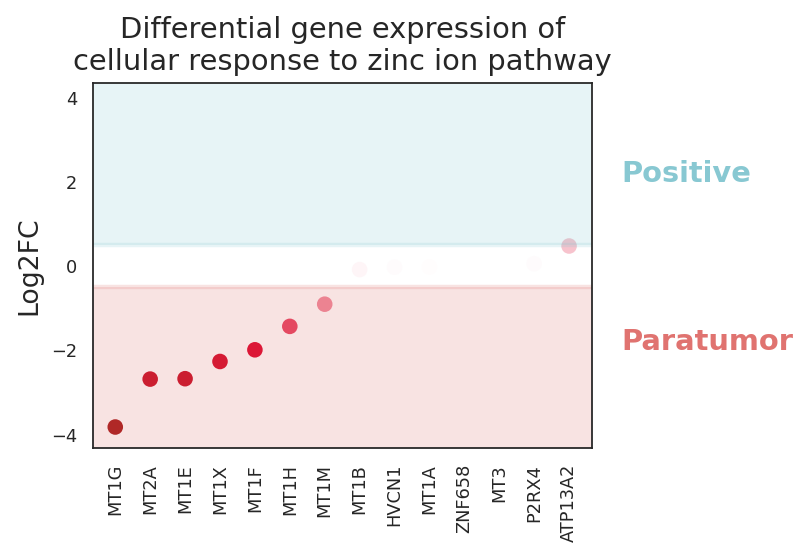

In [131]:
adata_raw_used = Enterocytes_all_genes[:,(Enterocytes_all_genes.var_names)&(pathway_dict['cellular response to zinc ion (GO:0071294)'])]
adata_raw_used_treatment = adata_raw_used[adata_raw_used.obs['Sample'].isin(['Pos'])]
adata_raw_used_control = adata_raw_used[adata_raw_used.obs['Sample'].isin(['Para'])]
result = adata_raw_used_treatment.to_df().mean(axis=0)
result = pd.DataFrame(result)
result.columns = ['Paratumor']
result['Positive'] =  adata_raw_used_control.to_df().mean(axis=0)
result_d=result.loc[:,'Paratumor']-result.loc[:,'Positive']
result_d=result_d.sort_values()


from colormap import Colormap
c = Colormap()
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017','#9F987F', '#E0DFED', '#EF7B77', '#279AD7',
 '#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10', '#EAEFC5', '#01A0A7', '#75C8CC', 
'#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812','#9DC3C3', '#A89C92', '#FEE00C','#FEF2A1']
rnacmap = c.cmap_linear( '#ffffff','#de0029','#a51616')
nodecmap= c.cmap_linear( '#a51616','#ffffff',sc_color[11])

type_color={
    'Pos':ov.pl.blue_color[4],
    'Neg':ov.pl.red_color[1]
}
fig, ax = plt.subplots(figsize=(4,3)) 

plt.scatter(result_d.index,result_d.values,c=abs(result_d.values),cmap=rnacmap)
regulons_d_num=(abs(result_d.min())>abs(result_d.max()) and abs(result_d.min()) or abs(result_d.max()))
regulons_d_min=(0-round(regulons_d_num,5))-0.5
regulons_d_max=round(regulons_d_num,5)+0.5
plt.yticks(fontsize=8)
plt.ylim(regulons_d_min,regulons_d_max)
plt.grid(False)

plt.xticks(fontsize=8,rotation=90)

plt.gca().add_patch(plt.Rectangle(xy=(-2,0.5),
width=len(result_d)+3, color=type_color['Pos'],
height=15,alpha=.2,
fill=True, linewidth=2))

plt.gca().add_patch(plt.Rectangle(xy=(-2,-0.5),
width=len(result_d)+3, color=type_color['Neg'],
height=-15,alpha=.2,
fill=True, linewidth=2))

plt.text(len(result_d)+0.5,2,'Positive',fontsize=13,color=type_color['Pos'],fontweight='bold')
plt.text(len(result_d)+0.5,-2,'Paratumor',fontsize=13,color=type_color['Neg'],ha='left',fontweight='bold')
ax.set_title('Differential gene expression of\ncellular response to zinc ion pathway', fontsize=13)
plt.ylabel('Log2FC',fontsize=12)
plt.savefig("Gastric/Figure/sFigure17/sFigure17_K.png",dpi=300,bbox_inches = 'tight')